# Histogram of Redshift in VST_ATLAS

In [1]:
import pandas as pd
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from adaptive_histogram import adaptive_histogram, score_vec
%matplotlib inline

Read the data from the galaxy file

In [2]:
source = '/Users/cong/Data/ATLAS/lib_gal__AT.fits'
vstatlas_features = ['rmagC', 'umg', 'gmr', 'rmi', 'imz', 'rmw1', 'w1m2']

raw_data = fits.open(source)
vstatlas_gal = pd.DataFrame(raw_data[1].data)
print(vstatlas_gal.shape)
vstatlas_gal.head()

(6559, 7)


rmagC       umg       gmr       rmi       imz      rmw1      w1m2
0  19.350498  0.784801  0.976801  0.264800  0.314200  0.788298 -0.195599
1  18.820898  2.017502  1.198801  0.386899  0.238900  0.572699 -0.343800
2  17.218401  1.222101  0.625299  0.253002  0.271899  0.074600 -0.462500
3  18.913601  1.046003  0.612598  0.361202  0.180799  0.553301 -0.431499
4  19.152201  1.671003  1.323898  0.438801  0.514800  1.084900 -0.250599

Helper plotting script

In [3]:
def plot_bars(ax, edges, heights):
    """Plot a bar chart which looks like a histogram.
    edges define the (edges-1) bars, each of which is height tall.
    """
    assert len(edges)-1 == len(heights)
    for ix,h in enumerate(heights):
        ax.add_patch(patches.Rectangle((edges[ix],0), edges[ix+1]-edges[ix], h))
        ax.text(0.5*(edges[ix+1]+edges[ix]), 1.05*h, '%1.3f'%h,
                ha='center', va='bottom', rotation=80, fontsize=9)
    ax.set_xlim([edges[0], edges[-1]])
    ax.set_ylim([0, np.max(heights)])



Plot the histogram and the adaptive histogram

In [4]:
redshift = vstatlas_gal['rmagC'].as_matrix()

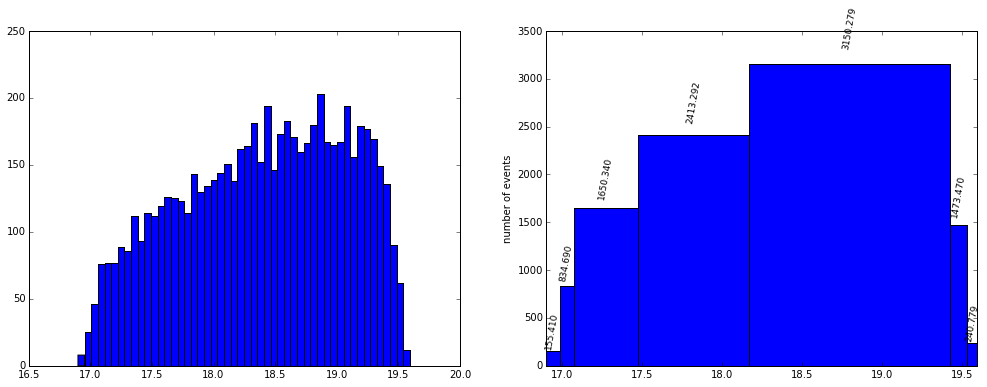

In [5]:
fig = plt.figure(figsize=(17,6))
ax1 = fig.add_subplot(121)
_ = plt.hist(redshift, 50)

bins = adaptive_histogram(redshift, prior=0.999)
score = score_vec(bins, redshift, 'intensity')
ax2 = fig.add_subplot(122)
plot_bars(ax2, bins, score)
ax2.set_ylabel('number of events')
#ax2.set_xlim([16.5, 20])
_ = ax2.set_ylim([0, 3500])